# 서울시에서 일어나는 범죄와 체감안전도
: 강남 3구 안전도가 얼마나 되는지, 서울시 전체의 안전도가 얼마나 되는지

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [164]:
crime_anal_police = pd.read_csv('../data/crime_in_Seoul.csv', encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [165]:
crime_anal_police[['살인 발생','강도 발생','강간 발생','절도 발생','폭력 발생']]

,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생
0,2,3,105,"1,395","1,355"
1,3,6,115,"1,070","1,278"
2,1,6,65,"1,153",869
3,2,5,154,"1,812","2,056"
4,3,5,96,"1,114","1,015"
5,5,14,194,"1,557","2,050"
6,2,2,86,953,"1,194"
7,5,13,173,"1,981","2,548"
8,8,14,294,"2,555","2,983"
9,14,22,295,"2,964","3,572"


In [166]:
crime_anal_police.관서명

0      중부서
1      종로서
2     남대문서
3     서대문서
4      혜화서
5      용산서
6      성북서
7     동대문서
8      마포서
9     영등포서
10     성동서
11     동작서
12     광진서
13     서부서
14     강북서
15     금천서
16     중랑서
17     강남서
18     관악서
19     강서서
20     강동서
21     종암서
22     구로서
23     서초서
24     양천서
25     송파서
26     노원서
27     방배서
28     은평서
29     도봉서
30     수서서
Name: 관서명, dtype: object

In [167]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [168]:
police_address = pd.read_csv('../data/SeoulPoliceAddress.csv')
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [169]:
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


> 관서명으로 merge 하려면 바꿀게 많다.

In [170]:
'서울'+crime_anal_police.관서명.str[:-1]+'경찰서'

0      서울중부경찰서
1      서울종로경찰서
2     서울남대문경찰서
3     서울서대문경찰서
4      서울혜화경찰서
5      서울용산경찰서
6      서울성북경찰서
7     서울동대문경찰서
8      서울마포경찰서
9     서울영등포경찰서
10     서울성동경찰서
11     서울동작경찰서
12     서울광진경찰서
13     서울서부경찰서
14     서울강북경찰서
15     서울금천경찰서
16     서울중랑경찰서
17     서울강남경찰서
18     서울관악경찰서
19     서울강서경찰서
20     서울강동경찰서
21     서울종암경찰서
22     서울구로경찰서
23     서울서초경찰서
24     서울양천경찰서
25     서울송파경찰서
26     서울노원경찰서
27     서울방배경찰서
28     서울은평경찰서
29     서울도봉경찰서
30     서울수서경찰서
Name: 관서명, dtype: object

In [171]:
station_name = []
for name in crime_anal_police['관서명']:
    station_name.append('서울'+name[:-1]+'경찰서')
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [172]:
station_name = []
station_name = list('서울'+crime_anal_police.관서명.str[:-1]+'경찰서')

In [173]:
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [174]:
# 경찰서 수 확인하기
print(len(station_name), len(police_address))

31 31


In [175]:
import urllib.request

client_id = ""
client_secret = ""

In [176]:
# police_address[["lat","lng"]] = 0.0
# police_address.head()

In [177]:
# ext = []
# for i in range(len(police_address)):
#   encText = urllib.parse.quote(police_address.loc[i,"주소"])
#   url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
#   request = urllib.request.Request(url)
#   request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
#   request.add_header("X-NCP-APIGW-API-KEY",client_secret)

#   response = urllib.request.urlopen(request)
#   rescode = response.getcode()

#   if rescode == 200:
#     response_body = response.read()
#     enText = response_body.decode()
#   else:
#     print("Error Code:" + rescode)

#   import json
#   data1 = json.loads(enText)
#   try:
#     police_address["lng"][i] = data1['addresses'][0]['x']
#     police_address["lat"][i] = data1['addresses'][0]['y']
#   except:
#     ext.append(i)
#     print(police_address.loc[i,"경찰관서"])


In [178]:
police_address = pd.read_csv('../data/SeoulPoliceAddress_lat_lng.csv')

In [179]:
police_address.head()

,경찰관서,전화번호,FAX,주소,lat,lng
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,37.563514,126.989614
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,37.575532,126.984929
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,37.554819,126.973563
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,37.564902,126.966785
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,37.571876,126.998932


In [180]:
# police_address.to_csv('../data/SeoulPoliceAddress_lat_lng.csv', index=False)

In [181]:
len(station_name == police_address['경찰관서'])

31

> 같은 게 31 개 : 순서도 같다

In [182]:
# 구별 컬럼 만들기
a_list = []
for i in range(len(police_address)):
    a_list.append(police_address.주소[i].split()[1])
a_list

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '관악구',
 '중랑구',
 '강남구',
 '관악구',
 '양천구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [183]:
# 주소 2번째 단어의 끝에 '구' 이름만 출력하기
gu_name = []

for name in police_address['주소']:
    temp = name.split() # 주소를 공백으로 나누기
    temp_gu = [gu for gu in temp if gu[-1]=='구'][0] # 구로 끝나는 문자열만 temp_gu에 저장
    # print(temp_gu)
    gu_name.append(temp_gu)
gu_name

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '관악구',
 '중랑구',
 '강남구',
 '관악구',
 '양천구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [184]:
len(gu_name)

31

In [185]:
# list의 중복값 확인 : unique와 같은 기능
len(set(gu_name))

23

In [186]:
crime_anal_police['구별'] = a_list
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [187]:
police_address['구별'] = a_list
police_address.head()

,경찰관서,전화번호,FAX,주소,lat,lng,구별
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,37.563514,126.989614,중구
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,37.575532,126.984929,종로구
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,37.554819,126.973563,중구
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,37.564902,126.966785,서대문구
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,37.571876,126.998932,종로구


In [188]:
(crime_anal_police.관서명=='금천서').sum()

1

In [189]:
# DataSet을 보면 금천서가 관악구로 되어있지만, 현재는 금천구에 편성되어있다.
crime_anal_police.loc[crime_anal_police.관서명=='금천서', ['구별']] = '금천구'

In [190]:
crime_anal_police.loc[crime_anal_police.관서명=='금천서', ['구별']]

,구별
15,금천구


In [191]:
# 강서경찰서 양천구 > 강서구
crime_anal_police.loc[crime_anal_police.관서명=='강서서', ['구별']] = '강서구'
crime_anal_police.loc[crime_anal_police.관서명=='강서서', ['구별']]

,구별
19,강서구


In [192]:
# 확인
len(crime_anal_police['구별'].unique())

25

In [193]:
# # csv 저장
# crime_anal_police.to_csv('../data/Seoul_crime_gu_name.csv', index=False)

In [194]:
crime_anal_police = pd.read_csv('../data/Seoul_crime_gu_name.csv')

In [195]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


> 관서명으로 데이터를 정리하는 것이 아니고 구별로 데이터를 정리해야한다.

In [196]:
len(crime_anal_police)

31

In [197]:
# # , 들어간 값들 제외하고 int로 바꿔주기
# crime_anal_police['절도 발생'] = crime_anal_police['절도 발생'].str.replace(',','').astype(int)
# crime_anal_police['절도 검거'] = crime_anal_police['절도 검거'].str.replace(',','').astype(int)
# crime_anal_police['폭력 발생'] = crime_anal_police['폭력 발생'].str.replace(',','').astype(int)
# crime_anal_police['폭력 검거'] = crime_anal_police['폭력 검거'].str.replace(',','').astype(int)

AttributeError: Can only use .str accessor with string values!

In [198]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [199]:
(crime_anal_police['구별']=='관악구').sum()

1

In [200]:
# 구별로 데이터를 정리한다.
crime_anal = pd.pivot_table(crime_anal_police,index='구별',aggfunc=sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [201]:
crime_anal['강간검거율'] = round((crime_anal.iloc[:,0] / crime_anal.iloc[:,1]) * 100, 2)
crime_anal['강도검거율'] = round((crime_anal.iloc[:,2] / crime_anal.iloc[:,3]) * 100, 2)
crime_anal['살인검거율'] = round((crime_anal.iloc[:,4] / crime_anal.iloc[:,5]) * 100, 2)
crime_anal['절도검거율'] = round((crime_anal.iloc[:,6] / crime_anal.iloc[:,7]) * 100, 2)
crime_anal['폭력검거율'] = round((crime_anal.iloc[:,8] / crime_anal.iloc[:,9]) * 100, 2)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.73,85.71,76.92,42.86,86.48
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.85,133.33,75.00,33.35,82.89
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.35,92.86,114.29,43.10,88.64
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.90,100.00,114.29,60.11,84.75
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.06,116.67,88.89,30.56,80.11


In [202]:
# 검거 건수는 삭제
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.73,85.71,76.92,42.86,86.48
강동구,156,6,4,2366,2712,78.85,133.33,75.00,33.35,82.89
강북구,153,14,7,1434,2649,82.35,92.86,114.29,43.10,88.64
강서구,262,13,7,2096,3207,72.90,100.00,114.29,60.11,84.75
관악구,320,12,9,2706,3298,69.06,116.67,88.89,30.56,80.11


> 전년도 발생한 사건의 검거 건수도 포함되어서 검거율이 100 넘는 곳이 발생한다.

In [203]:
# crime_anal[crime_anal.iloc[:, 5:] > 100] = 100

> 조건에 해당하는 값들만 한 번에 바뀐다.

In [204]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다.
# 컬럼이 서로 붇어있지 않을 경우에는 리스트로 만들어서 for문을 실행하자
for col in list(crime_anal.columns[5:]):
    crime_anal.loc[crime_anal.loc[:,col] > 100, col] = 100
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.73,85.71,76.92,42.86,86.48
강동구,156,6,4,2366,2712,78.85,100.00,75.00,33.35,82.89
강북구,153,14,7,1434,2649,82.35,92.86,100.00,43.10,88.64
강서구,262,13,7,2096,3207,72.90,100.00,100.00,60.11,84.75
관악구,320,12,9,2706,3298,69.06,100.00,88.89,30.56,80.11


In [205]:
crime_anal.loc[:,'강간검거율':].max()

강간검거율    100.00
강도검거율    100.00
살인검거율    100.00
절도검거율     60.11
폭력검거율     88.64
dtype: float64

In [206]:
crime_anal.rename(columns={
    '강간 발생':'강간', 
    '강도 발생':'강도', 
    '살인 발생':'살인', 
    '절도 발생':'절도', 
    '폭력 발생':'폭력'
    }, inplace=True)

In [207]:
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.73,85.71,76.92,42.86,86.48
강동구,156,6,4,2366,2712,78.85,100.00,75.00,33.35,82.89
강북구,153,14,7,1434,2649,82.35,92.86,100.00,43.10,88.64
강서구,262,13,7,2096,3207,72.90,100.00,100.00,60.11,84.75
관악구,320,12,9,2706,3298,69.06,100.00,88.89,30.56,80.11


---
## 데이터의 정규화(Normalization)
- 강도와 살인은 2자리수, 절도와 폭력은 4자리수
- 각각의 범죄 발생건수를 비슷한 범위에 놓고 비교하는 것이 편리하다.
- 각 항목의 값을 최대 1로 계산하여 그 비중 자체로 분석하는 것이 좋다.

In [208]:
# 머신러닝 모듈 사용하기 : sklearn(싸이키러닝)의 preprocessing 기능을 사용, 최대값과 최소값을 비교하여 정규화를 진행
from sklearn import preprocessing

In [209]:
# 정규화를 진행할 컬럼 설정
col = ['강간','강도','살인','절도','폭력']

In [210]:
crime_anal[col].max()

강간     449
강도      22
살인      14
절도    3850
폭력    4284
dtype: int64

In [211]:
# 정규화를 진행할 컬럼의 데이터 설정
x = crime_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [212]:
# 최대값과 최소값의 값 가져오기
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler

MinMaxScaler()

In [213]:
# 정규화 시킬 최종값은 비율로 계산되기 때문에 float으로 설정
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [214]:
# 정규화된 범죄건수가 있는 새로운 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [215]:
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.73,85.71,76.92,42.86,86.48
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.85,100.00,75.00,33.35,82.89
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.35,92.86,100.00,43.10,88.64
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.90,100.00,100.00,60.11,84.75
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.06,100.00,88.89,30.56,80.11


---
### CCTV 데이터와 합치기
: 구별 CCTV 수와 인구수를 가져와서 범죄율과 얼마나 상관성이 있는지 확인

In [216]:
result_CCTV = pd.read_csv('../data/CCTV_Result.csv', index_col='구별')
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.17,549898,544804,5094,72602,0.93,13.20
강동구,1879,82.96,457042,452646,4396,66401,0.96,14.53
강북구,1265,83.07,316750,312985,3765,61660,1.19,19.47
강서구,1617,77.89,595703,589302,6401,85992,1.07,14.44
관악구,3985,99.15,516662,499374,17288,76664,3.35,14.84


In [217]:
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.73,85.71,76.92,42.86,86.48,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.85,100.00,75.00,33.35,82.89,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.35,92.86,100.00,43.10,88.64,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.90,100.00,100.00,60.11,84.75,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.06,100.00,88.89,30.56,80.11,516662,3985


In [218]:
crime_anal_norm['범죄'] = round(crime_anal_norm.loc[:,:'폭력'].sum(axis=1), 2)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.73,85.71,76.92,42.86,86.48,549898,5221,4.86
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.85,100.00,75.00,33.35,82.89,457042,1879,1.29
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.35,92.86,100.00,43.10,88.64,316750,1265,1.64
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.90,100.00,100.00,60.11,84.75,595703,1617,2.33
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.06,100.00,88.89,30.56,80.11,516662,3985,2.86


In [219]:
import seaborn as sns

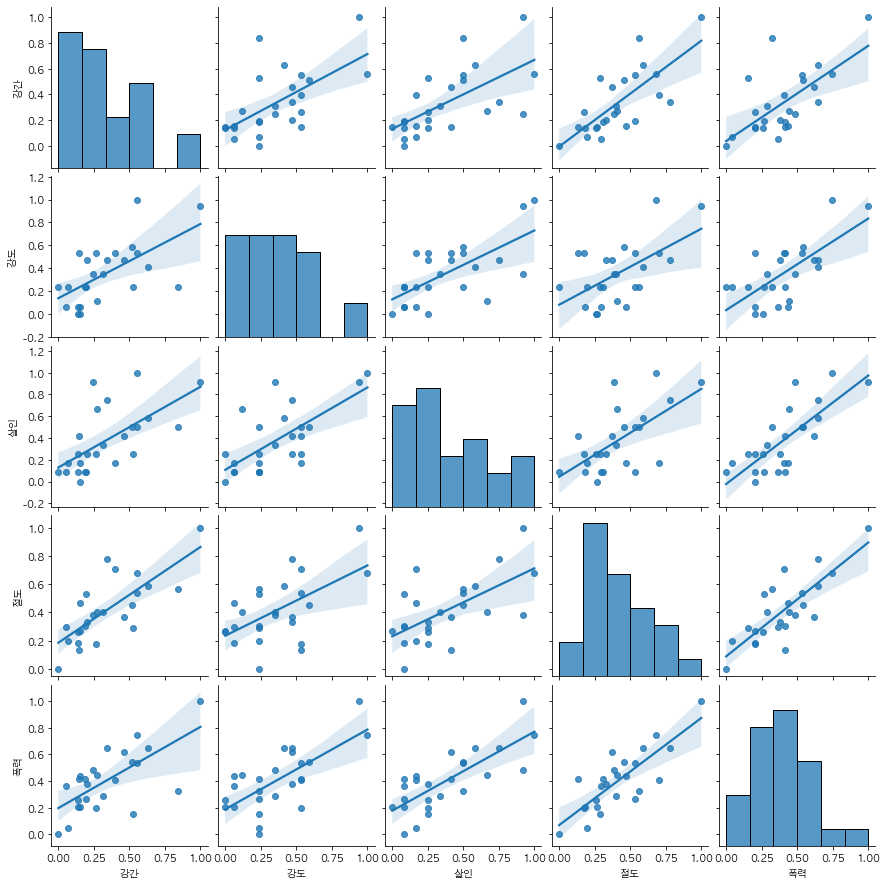

In [220]:
# 강간, 강도, 살인, 폭력, 절도 건수에 대한 상관관계 시각화
sns.pairplot(
    crime_anal_norm,
    vars=['강간','강도','살인','절도','폭력'],
    kind='reg'
)
plt.show()

> 5대 범죄 모두 양의 상관관계.   
> 예를 들어 강도의 건수가 많아지면 폭력과 살인의 발생건수도 많아진다.

## CCTV와 살인, 강도에 대한 그래프

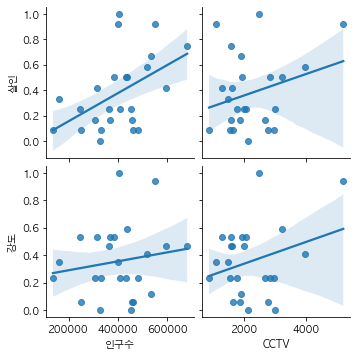

In [221]:
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수','CCTV'],
    y_vars=['살인','강도'],
    kind='reg'
)
plt.show()

> x축이 클수록 y축이 크다(양의 상관관계).   
> 특히, 강도보다는 살인 발생건수가 변동폭이 크다.   
> CCTV와 살인은 상관관계가 있으나, 강도에 비해 약하다.   
> 따라서 CCTV가 없을 때 강도 보다는 살인 사건이 발생할 가능성이 높다.   

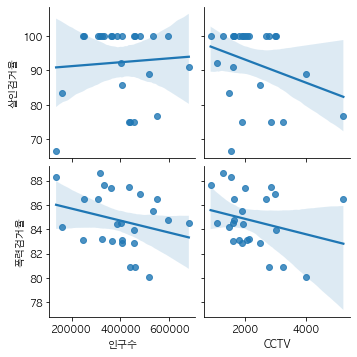

In [222]:
### 인구수, CCTV와 살인검거율, 폭력검거율을 회귀선으로 확인 후 comment
sns.pairplot(
    crime_anal_norm,
    x_vars=['인구수','CCTV'],
    y_vars=['살인검거율','폭력검거율'],
    kind='reg'
)
plt.show()

> 데이터의 분포가 밀집되어있는 곳에 집중하라, 선에 주목하지 말고   
> CCTV가 5대범죄용 말고 다른 것도 포함되어있을 수 있다.

---
## heatmap을 이용한 전체 검거율 확인

In [223]:
# 검거율도 통합하여 컬럼 생성
crime_anal_norm["검거"] = crime_anal_norm.iloc[:,5:10].apply(sum, axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.73,85.71,76.92,42.86,86.48,549898,5221,4.86,369.70
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.85,100.00,75.00,33.35,82.89,457042,1879,1.29,370.09
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.35,92.86,100.00,43.10,88.64,316750,1265,1.64,406.95
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.90,100.00,100.00,60.11,84.75,595703,1617,2.33,417.76
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.06,100.00,88.89,30.56,80.11,516662,3985,2.86,368.62


In [224]:
# 검거 최대값 가져오기
tmp_max = crime_anal_norm['검거'].max()
# 검거의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm['검거'] = crime_anal_norm['검거'] / 100

# 검거율 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values('검거',ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.00,100.0,100.0,44.97,87.63,333495,858,0.32,4.3260
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.79,100.0,100.0,56.67,86.47,251370,1634,0.67,4.2393
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.90,100.0,100.0,60.11,84.75,595703,1617,2.33,4.1776
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.67,100.0,100.0,42.20,83.05,365990,1581,2.20,4.1692
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.39,100.0,100.0,41.09,87.40,362793,2003,1.63,4.1288


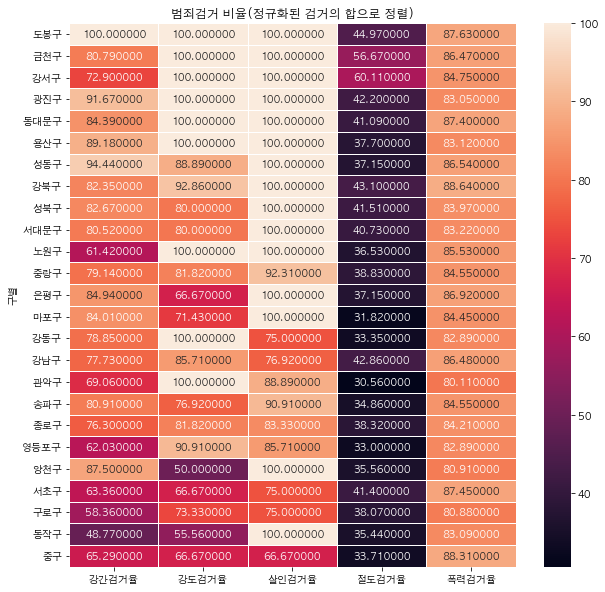

In [225]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot=True, # 숫자 표기
    fmt='f', # 표기 format float
    linewidths=0.5,
)

plt.title('범죄검거 비율(정규화된 검거의 합으로 정렬)')

plt.show()

> 절도 검거율이 다른 검거율에 비해 매우 저조하다.   
> 검거율이 우수한 지역은 도봉구, 광진구, 용산구, 성동구이다.

### heatmap을 이용한 범죄 발생율 확인.

In [226]:
tmp_max = crime_anal_norm['범죄'].max()
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5

crime_anal_norm_sort2 = crime_anal_norm.sort_values('범죄',ascending=False)
crime_anal_norm_sort2.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.73,85.71,76.92,42.86,86.48,549898,5221,0.972,3.6970
영등포구,0.556196,1.000000,1.000000,0.682095,0.745442,62.03,90.91,85.71,33.00,82.89,404766,2495,0.796,3.5454
송파구,0.340058,0.470588,0.750000,0.780768,0.646407,80.91,76.92,90.91,34.86,84.55,680883,1586,0.598,3.6815
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.06,100.00,88.89,30.56,80.11,516662,3985,0.572,3.6862
마포구,0.553314,0.529412,0.500000,0.535343,0.534859,84.01,71.43,100.00,31.82,84.45,386086,1935,0.530,3.7171


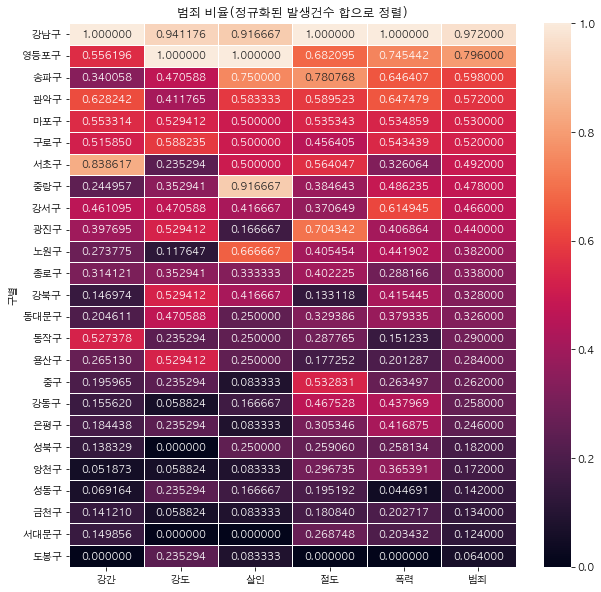

In [227]:
target_col = ['강간','강도','살인','절도','폭력','범죄']

plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort2[target_col],
    annot=True, # 숫자 표기
    fmt='f', # 표기 format float
    linewidths=0.5,
)

plt.title('범죄 비율(정규화된 발생건수 합으로 정렬)')

plt.show()

In [231]:
crime_anal_norm.to_csv('../data/seoul_crime_norm.csv', index=False)

### 지도 출력

In [228]:
import json
import folium

In [229]:
geo_path = '../data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [243]:
# 살인건수 지도 띄우기
map = folium.Map(
  location=[37.5502, 126.982],
  zoom_start=10.5,
  tiles="Stamen Toner"
)

folium.Choropleth(
  geo_data=geo_str,
  data=crime_anal_norm,
  columns=[crime_anal_norm.index, "살인"],
  fill_color="PuRd",
  key_on="feature.id"
).add_to(map)

# folium.Choropleth(
#   geo_data=geo_str,
#   data=crime_anal_norm,
#   columns=[crime_anal_norm.index, "강간"],
#   fill_color="Blues",
#   key_on="feature.id"
# ).add_to(map)

map

In [244]:
# 인구대비 범죄율 지도 출력 : 범죄 / 인구수 * 100000
crime_anal_norm['인구대비범죄율'] = crime_anal_norm['범죄'] / crime_anal_norm.인구수 * 100000
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거,인구대비범죄율
구별,,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.73,85.71,76.92,42.86,86.48,549898,5221,0.972,3.6970,0.176760
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.85,100.00,75.00,33.35,82.89,457042,1879,0.258,3.7009,0.056450
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.35,92.86,100.00,43.10,88.64,316750,1265,0.328,4.0695,0.103552
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.90,100.00,100.00,60.11,84.75,595703,1617,0.466,4.1776,0.078227
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.06,100.00,88.89,30.56,80.11,516662,3985,0.572,3.6862,0.110711


In [ ]:
map = folium.Map(
  location=[37.5502, 126.982],
  zoom_start=10.5,
  tiles="Stamen Toner"
)

folium.Choropleth(
  geo_data=geo_str,
  data=crime_anal_norm,
  columns=[crime_anal_norm.index, "인구대비범죄율"],
  fill_color="PuRd",
  key_on="feature.id"
).add_to(map)

map